<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/03-weightpruning-ASLMNIST/a3_q3_WeightPruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
 pip install -q tensorflow-model-optimization


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Reading and Visualizing Dataset

In [3]:
train_path = '/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_train'
test_path = '/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_test'

In [4]:
import glob
all_train = glob.glob(train_path + "/*.csv") 
all_test = glob.glob(test_path + "/*.csv")
print(all_train,all_test)

['/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_train/sign_mnist_train.csv'] ['/content/drive/My Drive/Colab Notebooks/CS581/SignLanguageMNIST/sign_mnist_test/sign_mnist_test.csv']


In [5]:
traindf = pd.read_csv(all_train[0])
traindf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


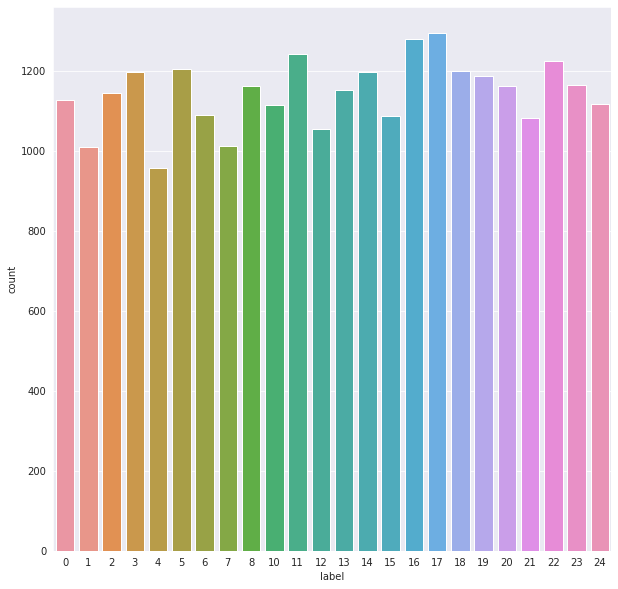

In [6]:
import seaborn as sns
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(traindf['label'])

In [7]:
testdf = pd.read_csv(all_test[0])
testdf

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,133,143,148,156,160,162,164,168,171,173,175,178,179,181,182,184,185,185,186,137,116,111,101,110,92,66,108,124,132,155,...,147,132,115,112,117,118,112,153,189,178,173,166,140,121,157,125,93,99,100,101,104,100,118,167,154,141,136,139,135,125,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,176,176,176,178,176,176,178,177,176,178,178,177,176,176,176,174,174,173,173,159,163,164,166,168,169,173,175,177,178,177,...,90,78,191,215,212,214,212,209,209,208,208,207,189,192,196,199,191,208,230,201,197,185,184,187,169,136,131,107,69,127,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,192,193,192,191,192,191,191,192,189,189,189,188,188,188,187,186,185,184,183,193,193,193,193,193,193,194,194,193,195,195,...,215,215,215,214,213,213,212,212,210,209,208,207,215,215,207,207,208,207,203,196,170,99,92,92,89,155,213,216,216,216,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,229,234,233,233,237,237,237,240,241,238,240,240,242,243,241,239,239,239,239,206,209,212,215,218,220,223,226,227,229,236,...,168,173,128,127,255,255,255,255,159,99,80,77,255,255,255,255,255,255,231,255,255,255,255,255,249,231,188,164,169,176,112,169,255,255,237,113,91,67,70,63


In [8]:
np.unique(testdf['label'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


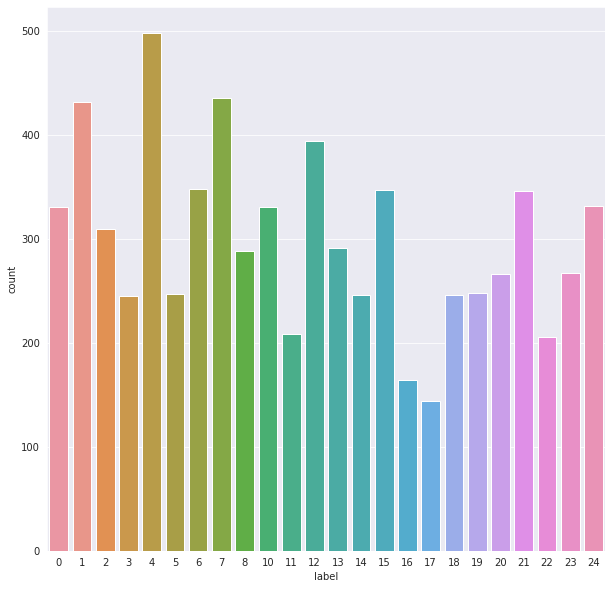

In [9]:
import seaborn as sns
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(testdf['label'])

In [10]:
y_train = traindf['label']
y_test = testdf['label']
del(traindf['label'])
del(testdf['label'])

In [11]:
x_train = traindf.values
x_test = testdf.values

In [12]:
y_train.shape, y_test.shape

((27455,), (7172,))

In [13]:
x_train.shape, x_test.shape

((27455, 784), (7172, 784))

In [14]:
#cast weights to float 32
x_train,x_test = x_train.astype('float32'),x_test.astype('float32')
# Normalize the data
x_train, x_test = x_train / 255, x_test / 255

In [15]:
class_names = [chr(a) for a in range(ord('a'),ord('z'))]
class_names

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y']

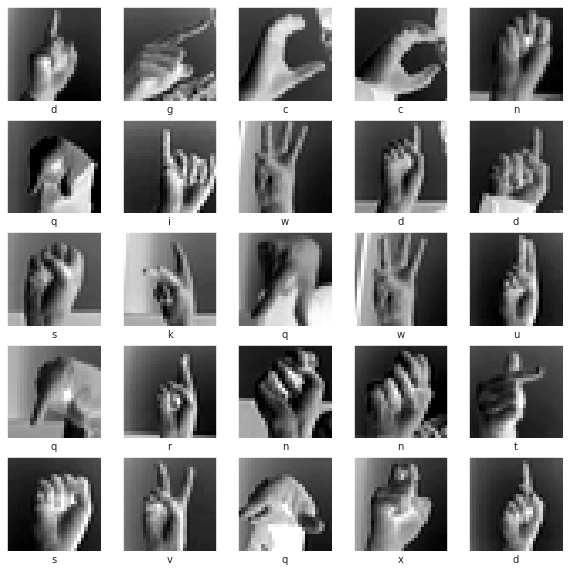

In [16]:
#plotting the images with their labels
# Reshaping the data from 1-D to 2-D as required to plot by matplotlib
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [17]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [18]:
x_train.shape, x_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [19]:
# # convert class vectorr to binary class matrix
# print(y_train.head(),len(y_train),'\n',y_test.head(),len(y_test))
# y_train = tf.keras.utils.to_categorical(y_train)
# y_test = tf.keras.utils.to_categorical(y_test)

In [20]:
# print('y_train',y_train[:5],f'One Row is of Length = {len(y_train[0])} \n\n y_test',y_test[:5])

In [21]:
# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28)
x_test = x_test.reshape(-1,28,28)

# Baseline Model

In [27]:
model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='elu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(25))


In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)              

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0149 - accuracy: 0.9969 - val_loss: 0.6994 - val_accuracy: 0.9254
Epoch 2/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0210 - accuracy: 0.9953 - val_loss: 0.6549 - val_accuracy: 0.9366
Epoch 3/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0146 - accuracy: 0.9964 - val_loss: 0.7279 - val_accuracy: 0.9339
Epoch 4/10
858/858 [==============================] - 10s 11ms/step - loss: 0.0085 - accuracy: 0.9980 - val_loss: 0.7710 - val_accuracy: 0.9389
Epoch 5/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.9169 - val_accuracy: 0.9412
Epoch 6/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.9660 - val_accuracy: 0.9426
Epoch 7/10
858/858 [==============================] - 9s 11ms/step - loss: 0.0097 - accuracy: 0.9980 - val_loss: 0.9106 - val_accuracy: 0.945

In [32]:
scores = model.evaluate(x_test,y_test,verbose=0)
print(f'Test Loss:{scores[0]}')
print(f'Test Accuracy:{scores[1]}')

Test Loss:0.9577723741531372
Test Accuracy:0.9383714199066162


In [33]:
saved_model_dir = '/content/drive/My Drive/Colab Notebooks/CS581/assignment3/baseline_asl_mnist_q3.h5'
print(f"Saving Model to: {saved_model_dir}")
tf.keras.models.save_model(model,saved_model_dir,include_optimizer=False)

Saving Model to: /content/drive/My Drive/Colab Notebooks/CS581/assignment3/baseline_asl_mnist_q3.h5


# Pruning - Layer wise

In [46]:
from tensorflow_model_optimization.sparsity import keras as sparsity
%load_ext tensorboard

In [35]:
# we need 4 arguments for Polynomial Decay - begin step, end step, begin sparsity and end sparsity

# here we are calculating end step based on batch size 
epochs = 12
batch_size = 128
num_train_samples = x_train.shape[0]
end_step = np.ceil(1 * num_train_samples / batch_size).astype(np.int32) * epochs
end_step

2580

In [36]:
pruning_params = {
    'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.5,
                                                 final_sparsity=0.9,
                                                 begin_step = 2000,
                                                 end_step=end_step,
                                                 frequency=100)
}

In [45]:
pruned_model = tf.keras.Sequential([
    keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1)),
    sparsity.prune_low_magnitude(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)),pruning_schedule=pruning_params['pruning_schedule']),
    layers.MaxPool2D(pool_size=(2,2)),
    sparsity.prune_low_magnitude(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='elu'),pruning_schedule=pruning_params['pruning_schedule']),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    sparsity.prune_low_magnitude(layers.Dense(512, activation='relu'),pruning_schedule=pruning_params['pruning_schedule']),
    layers.Dropout(0.50),
    sparsity.prune_low_magnitude(layers.Dense(25, activation='softmax'),pruning_schedule=pruning_params['pruning_schedule'])
])

pruned_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 28, 28, 128)       2434      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 14, 14, 128)       295042    
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 512)              

In [48]:
 pruned_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

callbacks = [
             sparsity.UpdatePruningStep(),
             sparsity.PruningSummaries('./pruning_logs',profile_batch=0)
]

history = pruned_model.fit(x_train,
                           y_train,
                           epochs=10, 
                           batch_size=batch_size,
                           callbacks=callbacks,
                    validation_data=(x_test, y_test))

Epoch 1/10
215/215 [==============================] - 7s 32ms/step - loss: 2.9168 - accuracy: 0.3717 - val_loss: 2.7982 - val_accuracy: 0.4866
Epoch 2/10
215/215 [==============================] - 6s 30ms/step - loss: 2.5892 - accuracy: 0.7007 - val_loss: 2.6022 - val_accuracy: 0.6871
Epoch 3/10
215/215 [==============================] - 6s 30ms/step - loss: 2.4553 - accuracy: 0.8337 - val_loss: 2.4415 - val_accuracy: 0.8530
Epoch 4/10
215/215 [==============================] - 6s 30ms/step - loss: 2.3481 - accuracy: 0.9398 - val_loss: 2.4005 - val_accuracy: 0.8907
Epoch 5/10
215/215 [==============================] - 7s 31ms/step - loss: 2.3359 - accuracy: 0.9506 - val_loss: 2.4005 - val_accuracy: 0.8871
Epoch 6/10
215/215 [==============================] - 7s 30ms/step - loss: 2.3069 - accuracy: 0.9800 - val_loss: 2.3714 - val_accuracy: 0.9184
Epoch 7/10
215/215 [==============================] - 6s 30ms/step - loss: 2.2902 - accuracy: 0.9961 - val_loss: 2.3603 - val_accuracy: 0.9289

In [50]:
#the history variable collects the accuracy and loss for both train and test validation at each step
history.history

{'accuracy': [0.37169915437698364,
  0.7007466554641724,
  0.833655059337616,
  0.9398288130760193,
  0.9506465196609497,
  0.9800036549568176,
  0.9960662722587585,
  0.9975232481956482,
  0.9973775148391724,
  0.9930067658424377],
 'loss': [2.916839599609375,
  2.5892460346221924,
  2.4553170204162598,
  2.3481013774871826,
  2.335944175720215,
  2.3069474697113037,
  2.2902305126190186,
  2.28840970993042,
  2.2886013984680176,
  2.2954108715057373],
 'val_accuracy': [0.4866146147251129,
  0.6871165633201599,
  0.8530396223068237,
  0.8906859755516052,
  0.887060821056366,
  0.9184327721595764,
  0.9288901090621948,
  0.9316787719726562,
  0.9404628872871399,
  0.9283323884010315],
 'val_loss': [2.7982404232025146,
  2.6021759510040283,
  2.4415361881256104,
  2.4005391597747803,
  2.400548219680786,
  2.371382236480713,
  2.360299587249756,
  2.3560643196105957,
  2.3463382720947266,
  2.3587896823883057]}

In [51]:
pruned_scores = pruned_model.evaluate(x_test,y_test)

225/225 [==============================] - 1s 6ms/step - loss: 2.3588 - accuracy: 0.9283


In [52]:
print(f'Test Loss:{pruned_scores[0]}')
print(f'Test Accuracy:{pruned_scores[1]}')

Test Loss:2.358790159225464
Test Accuracy:0.9283323884010315


In [53]:
pruned_saved_model_dir = '/content/drive/My Drive/Colab Notebooks/CS581/assignment3/pruned_asl_mnist_q3.h5'
print(f"Saving Model to: {pruned_saved_model_dir}")
tf.keras.models.save_model(pruned_model,pruned_saved_model_dir,include_optimizer=True)

Saving Model to: /content/drive/My Drive/Colab Notebooks/CS581/assignment3/pruned_asl_mnist_q3.h5


## Post-optimization training for finesse and testing the pruned model

In [59]:
with sparsity.prune_scope():
    restored_pruned = tf.keras.models.load_model(pruned_saved_model_dir)

callbacks = [
             sparsity.UpdatePruningStep(),
             sparsity.PruningSummaries('./pruning_logs',profile_batch=0)
]

#restored_pruned.fit(x_train, y_train, batch_size=batch_size, epochs = 2, verbose=1, callbacks=callbacks, validation_data=(x_test,y_test))

restored_pruned_scores = restored_pruned.evaluate(x_test,y_test)
print(f'Test loss: {restored_pruned_scores[0]}')
print(f'Test Accutacy: {restored_pruned_scores[1]}')

225/225 [==============================] - 1s 6ms/step - loss: 2.3588 - accuracy: 0.0491
Test loss: 2.358790159225464
Test Accutacy: 0.04907975345849991


# Pruning - Whole Model